# **Atmosphere CO2 Concentration and Average Temperature Correlations**

**Thanks to my team: Bagas Alfian Firmansyah & Toriq Isnandar**

# **Problem Statement**

> **Book**: Heated Debate – Global Warming books - Project 7.5

Assume that there is a relationship between increasing concentrations of atmospheric carbon dioxide 
([CO2]) and average global temperature (T). Add these components to your carbon cycle model of 
Project 2 from Module 7.4, “What Goes Around Comes Around—The Carbon Cycle,” using the following 
relationships for CO2 concentration and change in temperature from the start to the end of the simulation, 
respectively:

|**Citation**|**Formula**|
|---|---|
|(Allmon et al. 2006)|[CO2] in ppm = 350 × (mass of CO2 in the atmosphere)/750|
|(Ward and Johnson 2004)|temperature change (oC) over entire period = 0.01([CO2] – 350)|



## **Flux Table**
> **Note**: 1 Gt carbon is equivalent to 3.66 Gt CO2.

<br><img src="assets/Picture1.png">
<br><img src="assets/Picture2.png">

## **Cycle Model**

<br><img src="assets/Picture3.jpg">

**Model for Deforestation (Houghton et al. 1999)** - Suppose a fossil-fuel-deposits reservoir has an initial value of **4000 Gt** and **Fluxes Combustion = 5 Gt C/year**, and **Deforestation = 1.15 Gt/year** respectively. Assume that the rate of change of fossil fuel emissions has constrained growth with a **carrying capacity of 15 Gt C/year** and **growth rate of 0.03/year**


In [22]:
import matplotlib.pyplot as plt

In [23]:
# Runge-Kutta 4 on Global Warming Problem

# Variable Initialization
deltaT = 0.01
# Iteration -> 12/deltaT
iteration = (int)((12 - 0)/deltaT)

# First State
pA = 750 # p0 carbon on atmosfer
pOS = 800 # p0 carbon on Ocean Surface
pDO = 38000 # p0 carbon on Deep Ocean
pTB = 600 # p0 carbon on Terestrial Biosphere
pS = 1500 # p0 carbon on Soil
ff = 4000 # p0 fossil fuel combustion stock
m = 15 # p0 constraint growth constant

In [24]:
# Calculate deltaP
def deltaPffc(x, y):
    # Fossil Fuel Combustion Stock to Atmosphere
    # Addition
    ffb = 0.00125 * y # Fossil Fuel Burning
    # Reduction
    ffresistor = 0.03 * (y / m) * y # Constraint
    y = ffb - ffresistor
    return y

In [25]:
# Plot Variable
tempPlot = [] # Temperature change value
concPlot = [] # co2 concentration value

# Runge-Kutta 4 on Global Warming Problem
for i in range(1, iteration + 1):
    CO2mass = pA * 3.66
    CO2conc = 350 * CO2mass / 750 
    tempChange = 0.01 * (CO2conc-350)

    # insert initial value of CO2 mass and CO2 concentration to list
    concPlot.append(CO2conc)
    tempPlot.append(tempChange)

    # CO2 cycle from Atmosphere to Ocean Surface
    mp = 0.053333333 * pA	 # marine photosynthesis act
    cd = 0.133333333 * pA # carbon dissolving act

    # CO2 cycle from Ocean Surface to Atmosphere
    mr = 0.05 * pOS # marine respiration act
    e = 0.125 * pOS # evaporation act

    # CO2 cycle from Ocean Surface to Deep Ocean
    md = 4 # marine death act - constant value
    down = 0.02875 * pOS # downwelling act

    # CO2 cycle from Deep Ocean to Ocean Surface
    up = 0.0007105263158 * pDO  # upwelling act

    # CO2 cycle from Atmosphere to Terestrial Biosphere
    tp = 0.146666666 * pA  # terestrial photosynthesis act

    # CO2 cycle from Terestrial Biosphere to Atmosphere
    tr = 0.0916666666 * pTB # terestrial respiration act
    deforestation = 0.001916666667 * pTB  # deforestation act

    # CO2 cycle from Terestrial Biosphere to Soil
    pdeath = 0.091666666 * pTB	 # plant death act

    # CO2 cycle from Soil to Atmosphere
    pdecay = 0.036666666 * pS  # plant decay act

    # CO2 cycle from Fuel Combustion Stock to Atmosphere
    # Addition
    ffb = 0.00125 * ff  # fossil fuel burning
    # Reduction
    ffresistor = 0.03 * (ff / m) * ff  # constraint

    # Updating CO2 Stock Value after Cycle
    pA = pA + (mr + e + tr + pdecay + deforestation + ffb) - (mp + cd + tp) # p carbon on Atmosphere
    pOS = pOS + (mp + cd +up) - (mr + e +md + down) # p carbon on Ocean Surface
    pDO = pDO + (md + down) - (up) # p carbon on Deep Ocean
    pTB = pTB + (tp) - (tr + pdeath + deforestation) # p carbon on Terestrial Biosphere
    pS = pS + (pdeath) - (pdecay) # p carbon on soil

    # Runge-Kutta 4 for Fossil Fuel Combustion Stock
    k1 = deltaT * deltaPffc(i, ff)
    k2 = deltaT * deltaPffc(i+0.5*deltaT, ff+0.5*k1)
    k3 = deltaT * deltaPffc(i+0.5*deltaT, ff+0.5*k2)
    k4 = deltaT * deltaPffc(i+deltaT, ff+k3)

    # Update next value of ff
    ff 	= ff + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

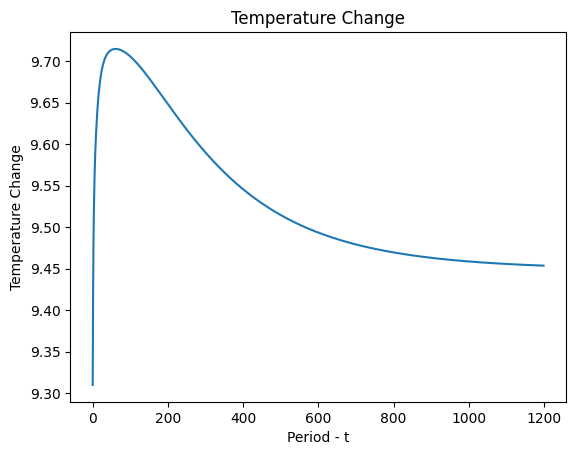

In [26]:
plt.title('Temperature Change')
plt.xlabel('Period - t')
plt.ylabel('Temperature Change')
plt.plot(tempPlot)
plt.show()

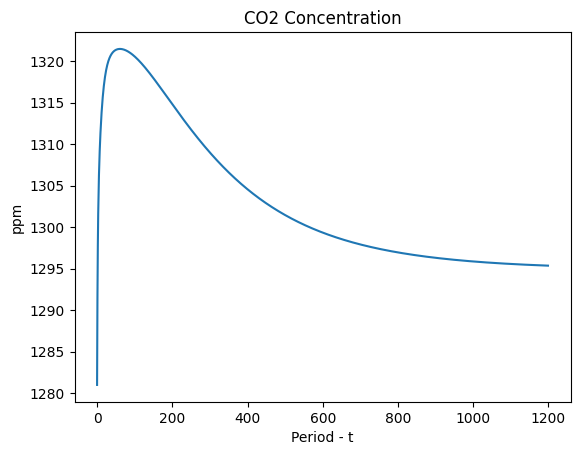

In [27]:
plt.title('CO2 Concentration')
plt.xlabel('Period - t')
plt.ylabel('ppm')
plt.plot(concPlot)
plt.show()

## **Conclusion**
From the simulation above, it can be concluded that there is a correlation between the rise of carbon dioxide's concentration in the atmosphere and the average temperature on earth. The more the amount of carbon dioxide on earth, it will cause the greenhouse effect. Although carbon dioxide is only one of several causes of the greenhouse effect, it is the main contributor to the greenhouse effect because the light emitted by sunlight is reflected back to the earth and is not absorbed in the atmosphere.